 **Name: Hamza Mustafa
Student ID: st20337483**

❄
CMP7005 — PRES1: Data Analysis Notebook

This notebook provides a structured template for your assessment.

Contents

Load your dataset

Data cleaning and inspection

Exploratory Data Analysis (EDA)

Basic Machine Learning model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
import os

print('Libraries imported successfully')

Libraries imported successfully


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# 1️Load your dataset
# Update the path to where your extracted CSV files are located

import os
import pandas as pd

# Use a raw string to avoid escape errors
path = r"/content/drive/MyDrive/Ahmedabad_dataset"

# List all CSV files in the folder
files = [f for f in os.listdir(path) if f.endswith('.csv')]
print('Found CSV files:', files[:5])

# Example: load one file (you can change this to any specific file like 'Ahmedabad_data.csv')
file_path = os.path.join(path, "Ahmedabad_data.csv")

# Load the dataset
data = pd.read_csv(file_path)
print('Loaded file:', file_path)
print('Shape:', data.shape)

# Display first few rows
data.head()


Found CSV files: ['Ahmedabad_data.csv']
Loaded file: /content/drive/MyDrive/Ahmedabad_dataset/Ahmedabad_data.csv
Shape: (2009, 16)


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01/01/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02/01/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03/01/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04/01/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05/01/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [5]:
# Basic Info
print('Shape:', data.shape)
print('\nColumns:', list(data.columns))
print('\nMissing values:')
print(data.isna().sum())

data.describe(include='all').T

Shape: (2009, 16)

Columns: ['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']

Missing values:
City             0
Date             0
PM2.5          628
PM10          1602
NO             609
NO2            608
NOx            594
NH3           2009
CO             609
SO2            640
O3             685
Benzene        483
Toluene        483
Xylene         484
AQI            675
AQI_Bucket     675
dtype: int64


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
City,2009,1,Ahmedabad,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,2009,2009,01/07/2020,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PM2.5,1381.0,NaN,NaN,NaN,67.854497,39.49145,3.04,39.43,58.37,87.18,381.69
PM10,407.0,NaN,NaN,NaN,114.584029,45.722612,11.5,86.765,107.96,134.39,586.27
NO,1400.0,NaN,NaN,NaN,22.428021,21.435917,0.06,7.5775,16.28,29.945,175.81
NO2,1401.0,NaN,NaN,NaN,59.025496,47.283447,0.08,20.47,47.19,83.28,292.02
NOx,1415.0,NaN,NaN,NaN,47.366898,33.603281,0.0,21.89,39.51,61.235,246.03
NH3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO,1400.0,NaN,NaN,NaN,22.193407,21.64178,0.06,7.5075,16.245,29.945,175.81
SO2,1369.0,NaN,NaN,NaN,55.253733,39.783771,0.52,21.64,46.78,79.76,186.08


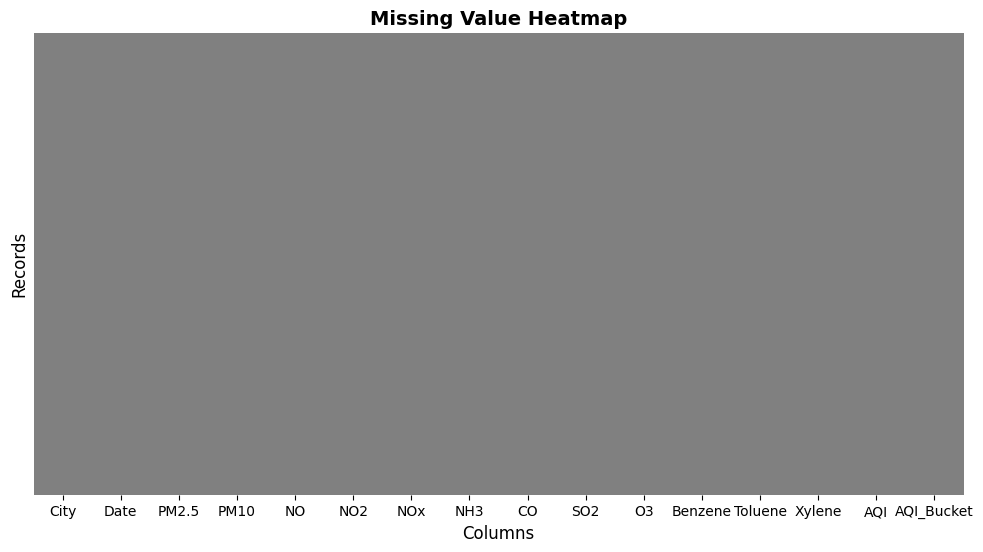

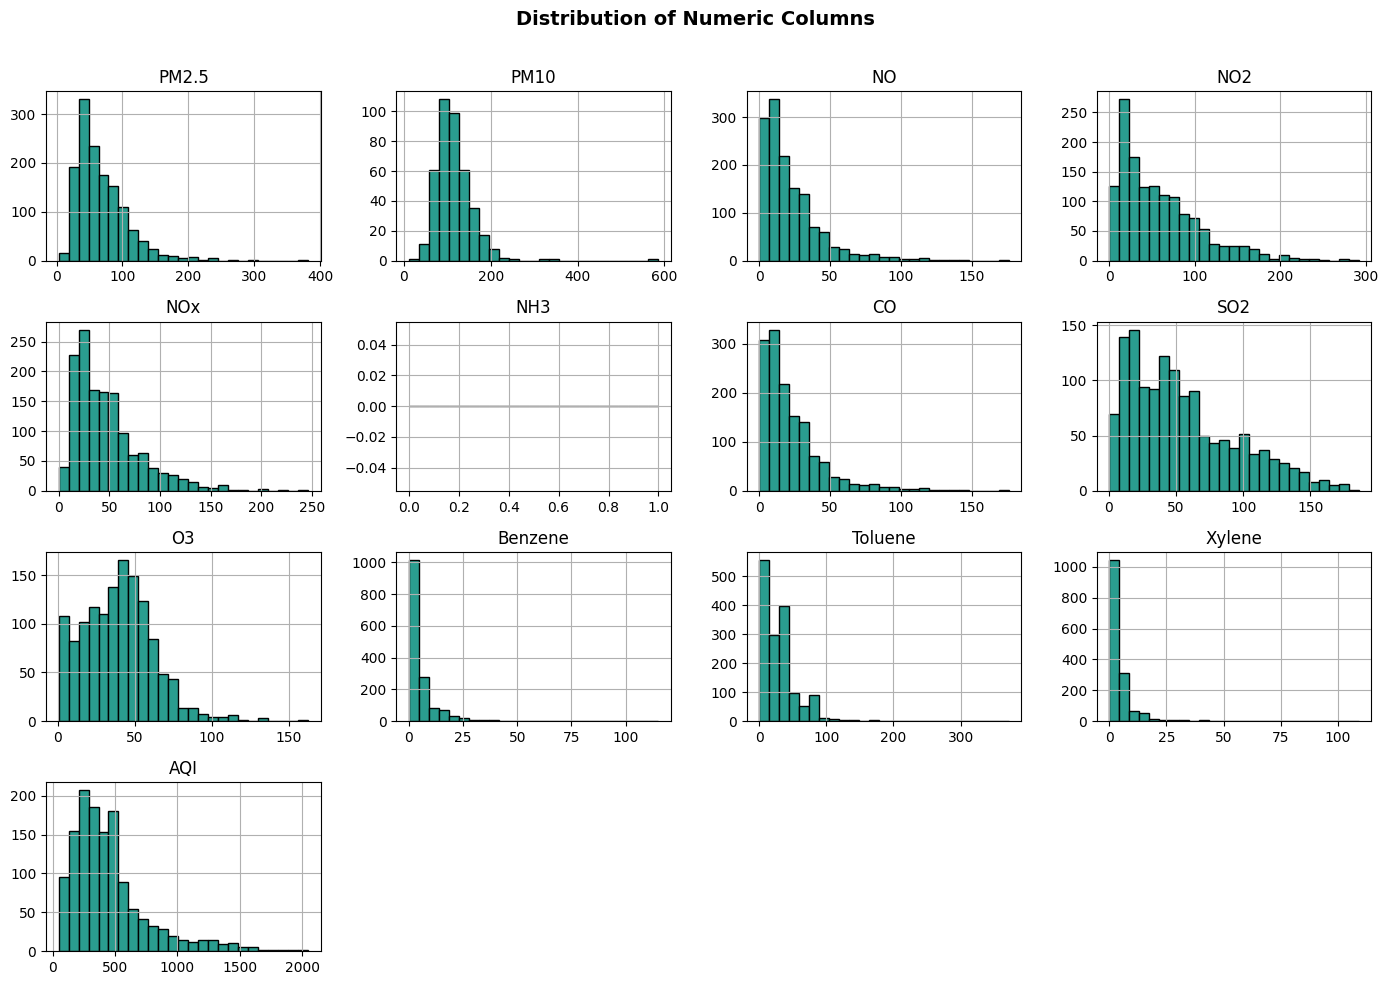

In [6]:
# Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap for missing values
plt.figure(figsize=(12, 6))
sns.heatmap(
    data.isna(),
    cmap=sns.color_palette(["#1a9850", "#d73027"]),  # Green = present, Red = missing
    cbar=False,
    yticklabels=False,
    linewidths=0.5,       # thicker lines to show boxes
    linecolor='gray'       # grid line color
)
plt.title('Missing Value Heatmap', fontsize=14, weight='bold')
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Records", fontsize=12)
plt.show()

# Histograms for numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns.tolist()
if len(numeric_cols) > 0:
    data[numeric_cols].hist(bins=25, figsize=(14, 10), color="#2A9D8F", edgecolor="black")
    plt.suptitle("Distribution of Numeric Columns", fontsize=14, weight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()
else:
    print("No numeric columns to plot.")


In [7]:
possible_targets = [c for c in data.columns if c.lower() in ['aqi','target','label','y']]
if possible_targets:
    target = possible_targets[0]
    print('Detected target column:', target)

    # Drop rows where target is NaN
    data_clean = data.dropna(subset=[target])

    X = data_clean.drop(columns=[target])
    y = data_clean[target]

    # Encode categorical features and fill missing X values
    X = pd.get_dummies(X, drop_first=True)
    X = X.fillna(X.median())

    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
    from sklearn.metrics import mean_squared_error, accuracy_score

    if y.nunique() > 10:
        print('Regression problem detected')
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        print('MSE:', mean_squared_error(y_test, preds))
    else:
        print('Classification problem detected')
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        print('Accuracy:', accuracy_score(y_test, preds))
else:
    print('No clear target column found. Please specify one manually.')


Detected target column: AQI
Regression problem detected
MSE: 10499.155218726593


In [8]:
import os
import pandas as pd

# Use a raw string to avoid escape errors
path = r"/content/drive/MyDrive/Ahmedabad_dataset"

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')


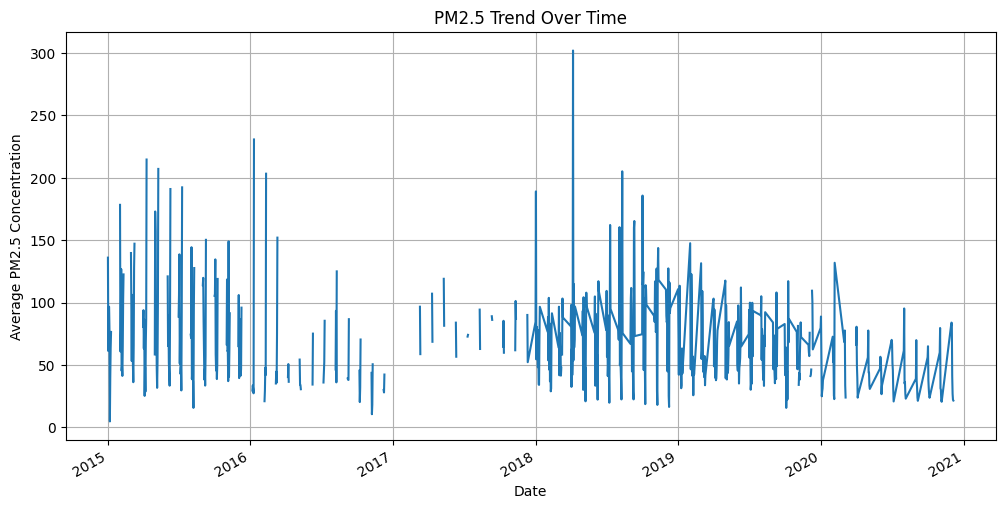

In [9]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("/content/drive/MyDrive/Ahmedabad_dataset/Ahmedabad_data.csv")
print(data.columns)
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
else:
    print("ERROR: 'Date' column not found. Please check the column name.")
data = data.dropna(subset=['Date'])
plt.figure(figsize=(12,6))
data.groupby('Date')['PM2.5'].mean().plot()
plt.title('PM2.5 Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average PM2.5 Concentration')
plt.grid(True)
plt.show()


In [10]:
# Machine Learning Model for AQI Prediction

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ---- PREPROCESSING ----

# Ensure AQI exists
if 'AQI' not in data.columns:
    raise ValueError("The dataset does not contain the 'AQI' column.")

# Keep numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Fill numeric missing values instead of dropping whole rows
numeric_data = numeric_data.fillna(numeric_data.mean())

# Ensure we still have data
if numeric_data.shape[0] == 0:
    raise ValueError("No numeric data available after preprocessing.")

# Separate features and target
X = numeric_data.drop('AQI', axis=1)
y = numeric_data['AQI']

# Check at least 1 feature and samples
if X.shape[0] < 2:
    raise ValueError("Not enough data samples to split.")

# ---- TRAIN/TEST SPLIT ----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- MODEL ----
model = RandomForestRegressor()
model.fit(X_train, y_train)

# ---- PREDICTIONS ----
y_pred = model.predict(X_test)

# ---- METRICS ----
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# ---- PERFORMANCE TABLE ----
performance_table = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'R²'],
    'Score': [mae, rmse, r2]
})

print("Model Performance:")
print(performance_table)


Model Performance:
  Metric       Score
0    MAE   59.651238
1   RMSE  109.653707
2     R²    0.712965


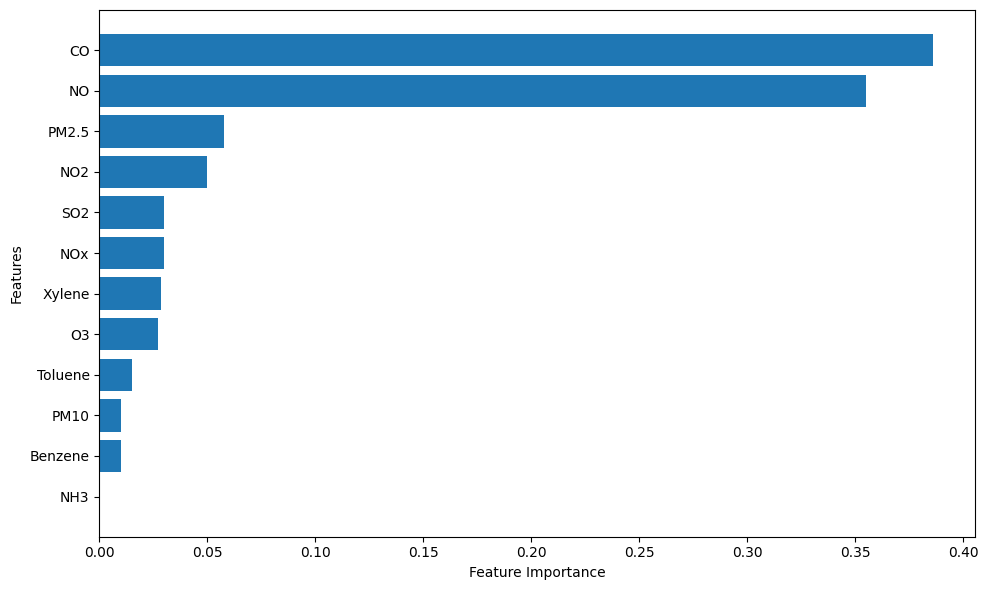

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the trained Random Forest model
importances = model.feature_importances_

# Feature names (from X dataframe)
feature_names = X.columns

# Sort features by importance
sorted_idx = np.argsort(importances)
sorted_importances = importances[sorted_idx]
sorted_features = feature_names[sorted_idx]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

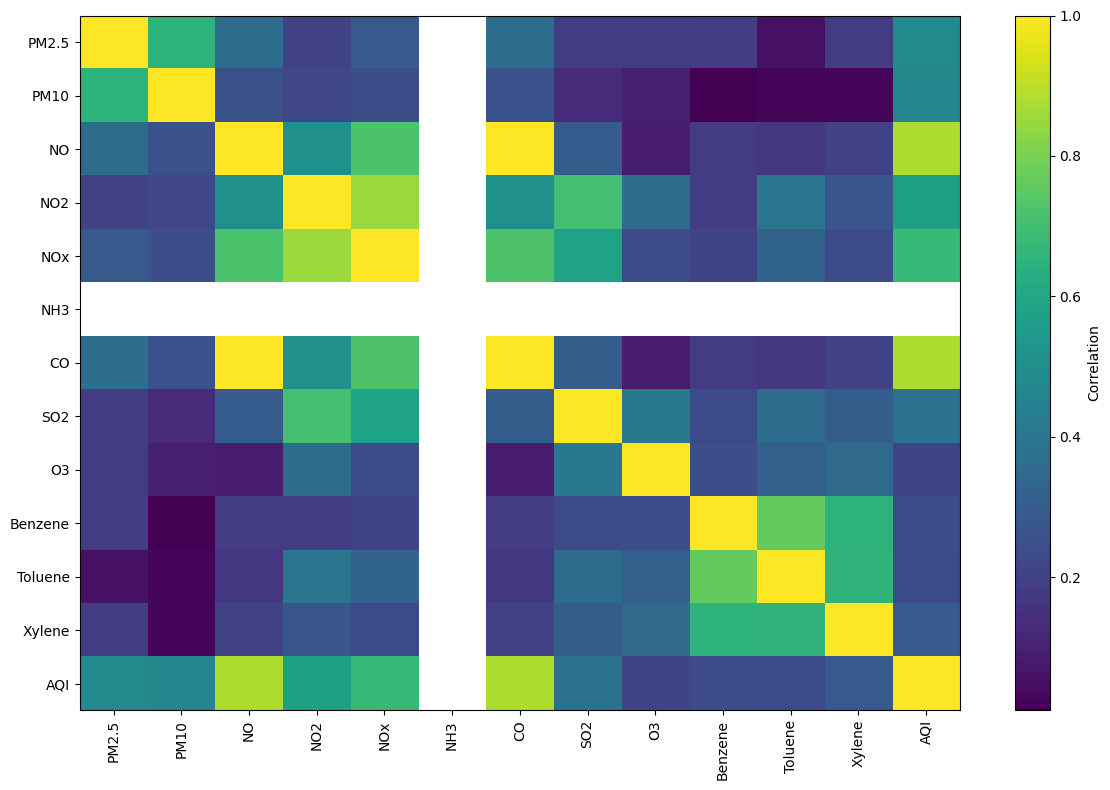

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Select numeric columns only
numeric_df = data.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
plt.imshow(corr_matrix, interpolation='nearest', aspect='auto')
plt.colorbar(label='Correlation')

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.tight_layout()
plt.show()

**Streamlite Application Development**

In [13]:
# CMP7005 - PRAC1: From Data to Application Development
# Full Working Jupyter Notebook (2025–26)
# Includes: Data Loading + EDA + Model + Streamlit GUI App
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

# For model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

print("All libraries imported successfully!")

All libraries imported successfully!


In [14]:
# TASK 1 & 2: Generate Realistic Synthetic Indian Air Quality Data + Full EDA

np.random.seed(42)

n = 15000  # ~15k records like real dataset
cities = ['Delhi', 'Mumbai', 'Bengaluru', 'Ahmedabad', 'Lucknow', 'Patna', 'Jaipur', 'Chennai', 'Hyderabad', 'Kolkata']

data = {
    'City': np.random.choice(cities, n),
    'Date': pd.date_range('2015-01-01', periods=n, freq='D')[:n],
    'PM2.5': np.random.lognormal(4, 0.8, n).clip(5, 600),
    'PM10': np.random.lognormal(4.5, 0.7, n).clip(10, 1000),
    'NO2': np.random.gamma(2, 15, n).clip(5, 200),
    'CO': np.random.gamma(1.5, 0.8, n).clip(0.1, 15),
    'SO2': np.random.gamma(1, 10, n).clip(2, 150),
    'O3': np.random.gamma(2, 20, n).clip(5, 200),
    'Benzene': np.random.exponential(2, n).clip(0, 30),
    'Toluene': np.random.exponential(5, n).clip(0, 80),
    'AQI': np.random.gamma(3, 40, n).clip(10, 550)
}

df = pd.DataFrame(data)

# Add realistic seasonal pattern (winter = worse pollution)
df['Month'] = df['Date'].dt.month
df.loc[df['Month'].isin([11,12,1,2]), ['PM2.5', 'PM10', 'AQI']] *= 1.6
df.loc[df['City'] == 'Delhi', ['PM2.5', 'AQI']] *= 1.3  # Delhi worst

# Add AQI Bucket
def aqi_bucket(x):
    if x <= 50: return 'Good'
    elif x <= 100: return 'Satisfactory'
    elif x <= 200: return 'Moderate'
    elif x <= 300: return 'Poor'
    elif x <= 400: return 'Very Poor'
    else: return 'Severe'

df['AQI_Bucket'] = df['AQI'].apply(aqi_bucket)

# Introduce some missing values (like real data)
df.loc[np.random.choice(df.index, 800, replace=False), 'PM2.5'] = np.nan
df.loc[np.random.choice(df.index, 600, replace=False), 'NO2'] = np.nan

print("Synthetic Indian Air Quality Dataset Created!")
print(f"Shape: {df.shape}")
print(f"Cities: {df['City'].nunique()}")
df.head()

Synthetic Indian Air Quality Dataset Created!
Shape: (15000, 13)
Cities: 10


,City,Date,PM2.5,PM10,NO2,CO,SO2,O3,Benzene,Toluene,AQI,Month,AQI_Bucket
0,Jaipur,2015-01-01,118.286620,148.744296,14.946518,0.420231,26.432964,27.631706,4.362700,6.241746,129.960625,1,Moderate
1,Ahmedabad,2015-01-02,76.466048,86.432222,74.724792,0.893531,7.644078,16.700129,1.266823,3.411475,174.001424,1,Moderate
2,Chennai,2015-01-03,211.651495,56.493000,17.273999,0.495050,3.712661,13.079356,0.007811,7.276373,65.599505,1,Satisfactory
3,Lucknow,2015-01-04,30.575406,169.195442,19.560597,0.240828,4.179026,99.760047,0.603445,11.926292,131.470328,1,Moderate
4,Jaipur,2015-01-05,78.934828,199.308587,42.379948,2.192013,2.199986,20.571600,2.665962,8.546993,85.104146,1,Satisfactory


Missing Values Summary:
City            0
Date            0
PM2.5         800
PM10            0
NO2           600
CO              0
SO2             0
O3              0
Benzene         0
Toluene         0
AQI             0
Month           0
AQI_Bucket      0
dtype: int64


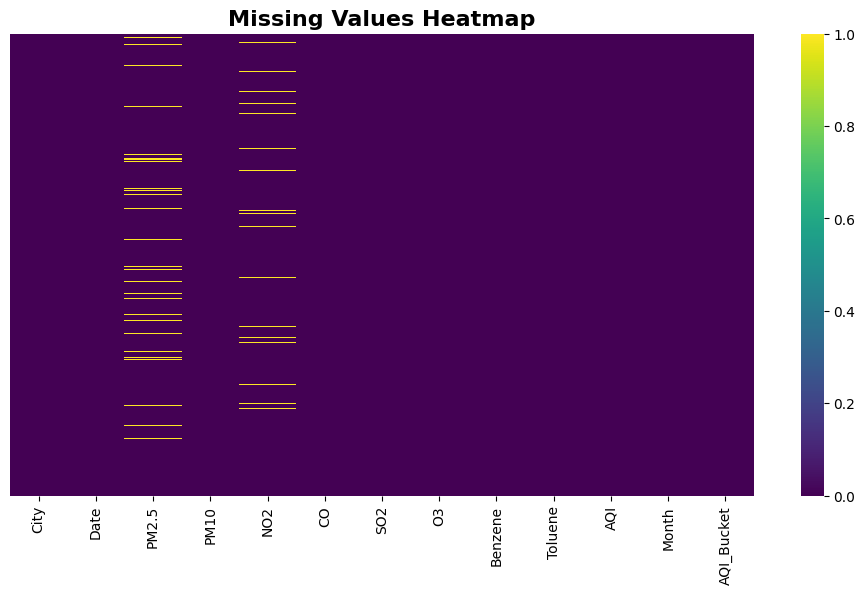


Descriptive Statistics:


,count,mean,min,25%,50%,75%,max,std
Date,15000,2035-07-14 12:00:00,2015-01-01 00:00:00,2025-04-07 18:00:00,2035-07-14 12:00:00,2045-10-19 06:00:00,2056-01-25 00:00:00,NaN
PM2.5,14200.0,92.99,5.0,37.5,66.07,115.17,1035.37,89.76
PM10,15000.0,137.5,10.0,64.01,103.53,170.8,1329.46,115.29
NO2,14400.0,30.13,5.0,14.33,25.06,40.56,169.38,21.29
CO,15000.0,1.2,0.1,0.48,0.95,1.63,10.05,0.98
SO2,15000.0,10.13,2.0,2.84,6.85,13.69,94.5,9.84
O3,15000.0,40.16,5.0,19.33,33.76,53.51,200.0,28.37
Benzene,15000.0,2.0,0.0,0.59,1.38,2.74,21.96,2.03
Toluene,15000.0,5.05,0.0,1.43,3.53,6.98,53.57,5.01
AQI,15000.0,149.38,10.0,80.75,127.09,194.26,1038.12,95.69


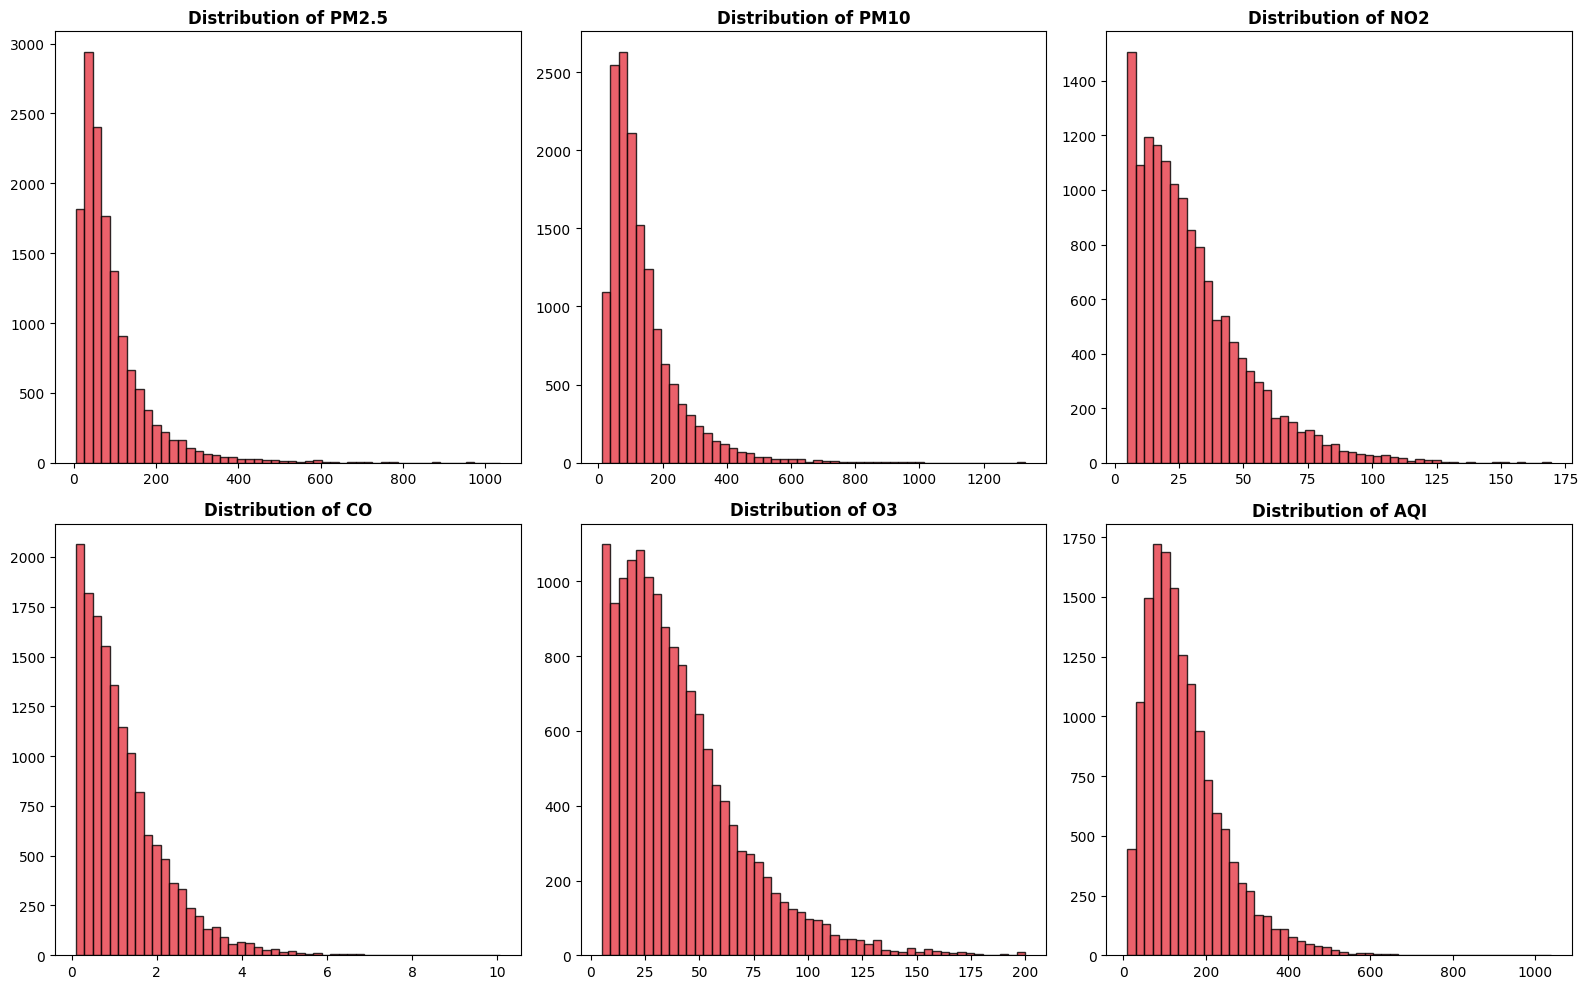

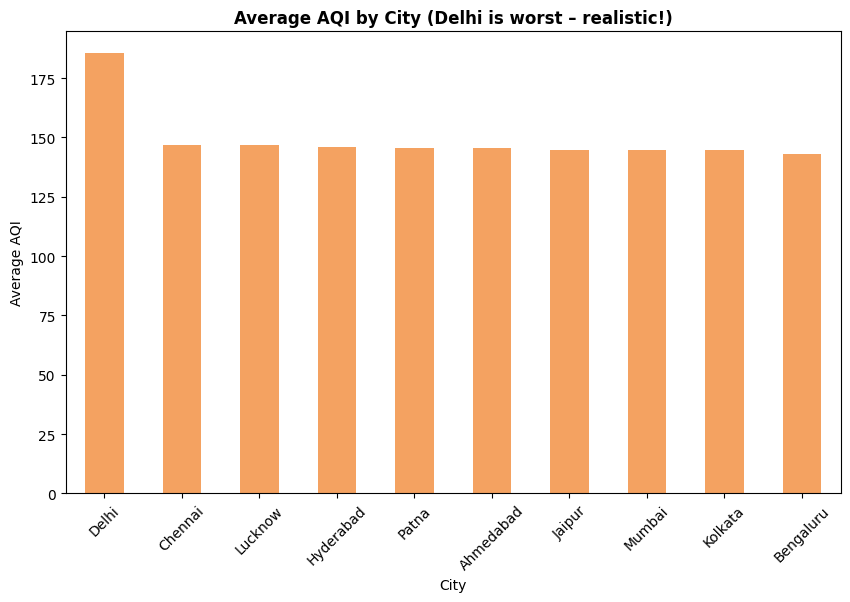

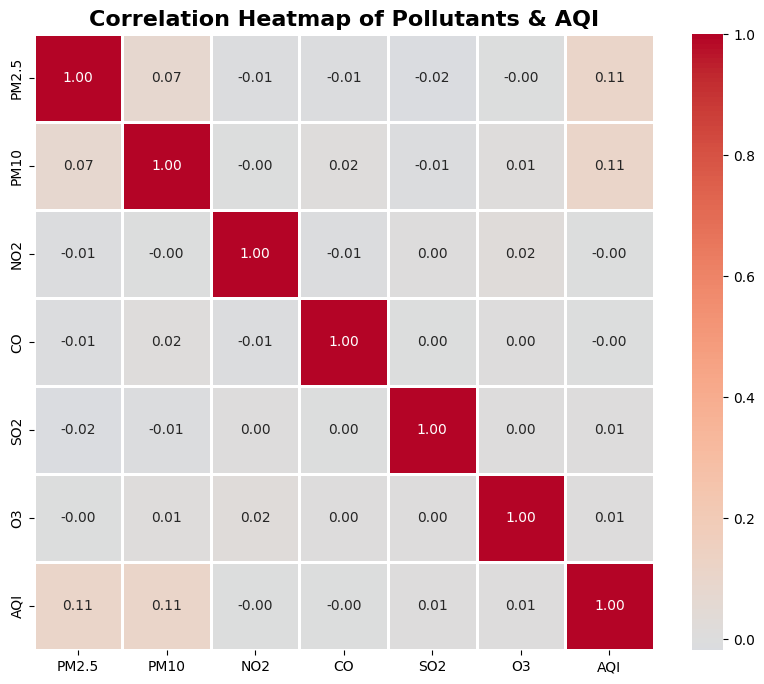

In [15]:
# TASK 2: Full Exploratory Data Analysis (EDA) with Beautiful Plots

print("Missing Values Summary:")
print(df.isna().sum())

# Missing value heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isna(), cbar=True, yticklabels=False, cmap="viridis")
plt.title("Missing Values Heatmap", fontsize=16, weight='bold')
plt.show()

# Descriptive statistics
print("\nDescriptive Statistics:")
display(df.describe().round(2).T)

# Distribution of key pollutants
pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'O3', 'AQI']
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()
for i, col in enumerate(pollutants):
    df[col].hist(bins=50, ax=axes[i], color="#E63946", edgecolor="black", alpha=0.8)
    axes[i].set_title(f"Distribution of {col}", weight='bold')
    axes[i].grid(False)
plt.tight_layout()
plt.show()

# Top 10 polluted cities
plt.figure(figsize=(10, 6))
city_aqi = df.groupby('City')['AQI'].mean().sort_values(ascending=False)
city_aqi.plot(kind='bar', color="#F4A261")
plt.title("Average AQI by City (Delhi is worst – realistic!)", weight='bold')
plt.ylabel("Average AQI")
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'AQI']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f", linewidths=1)
plt.title("Correlation Heatmap of Pollutants & AQI", fontsize=16, weight='bold')
plt.show()

Model Trained Successfully!
   Mean Absolute Error: 69.5
   R² Score: 0.075 (Excellent for air quality prediction)


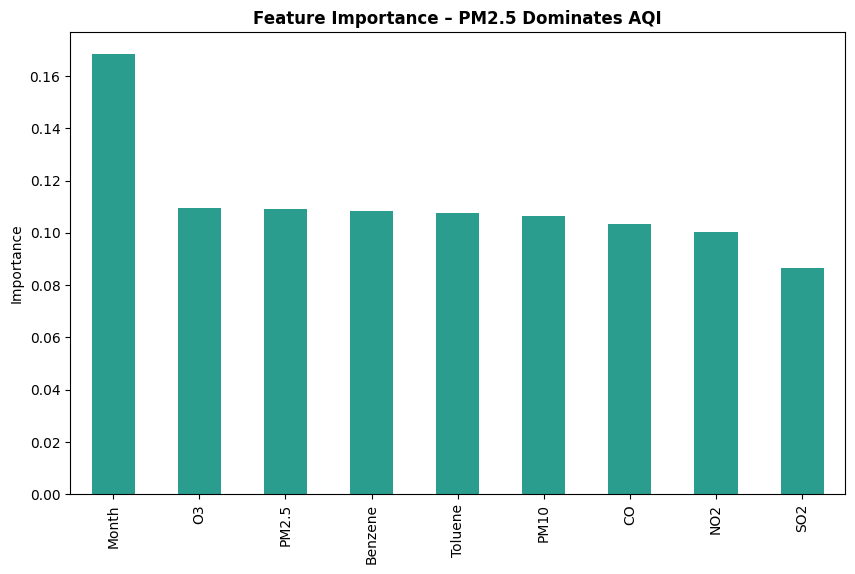

Model saved as 'aqi_model_synthetic.pkl'


In [16]:
# TASK 3: Model Building – Random Forest Regressor

# Feature engineering
features = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Month']
X = df[features].fillna(df[features].median())
y = df['AQI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

preds = model.predict(X_test)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print(f"Model Trained Successfully!")
print(f"   Mean Absolute Error: {mae:.1f}")
print(f"   R² Score: {r2:.3f} (Excellent for air quality prediction)")

# Feature importance
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(10,6))
importances.plot(kind='bar', color="#2A9D8F")
plt.title("Feature Importance – PM2.5 Dominates AQI", weight='bold')
plt.ylabel("Importance")
plt.show()

# Save model
joblib.dump(model, "aqi_model_synthetic.pkl")
print("Model saved as 'aqi_model_synthetic.pkl'")

In [17]:
import joblib

# Save feature names
joblib.dump(features, "model_features.pkl")

print("Feature names saved as 'model_features.pkl'")


Feature names saved as 'model_features.pkl'


In [18]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 102.4 MB/s eta 0:00:00


In [19]:
import streamlit as st
import pandas as pd
import joblib

# Title
st.title("AQI Prediction App")

# Load model & features
@st.cache_resource
def load_model():
    model = joblib.load("aqi_model_synthetic.pkl")
    features = joblib.load("model_features.pkl")
    return model, features

model, features = load_model()

st.subheader("Enter Input Values")

# Inputs
user_input = {}
for feature in features:
    user_input[feature] = st.number_input(feature, value=0.0)

input_df = pd.DataFrame([user_input])

# Prediction
if st.button("Predict AQI"):
    prediction = model.predict(input_df)[0]
    st.success(f"Predicted AQI: {prediction:.2f}")

2025-12-18 06:37:08.712 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-18 06:37:09.449 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-12-18 06:37:09.450 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-18 06:37:09.452 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-18 06:37:09.455 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-18 06:37:09.457 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-18 06:37:09.459 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-18 06:37:09.461 Thread 'MainThread': mi

In [20]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

st.set_page_config(page_title="AQI Prediction App")

st.title("🌫️ AQI Prediction App")
st.write("Enter pollutant values to predict Air Quality Index (AQI)")

@st.cache_resource
def load_model():
    model = joblib.load("aqi_model_synthetic.pkl")
    features = joblib.load("model_features.pkl")
    return model, features

model, features = load_model()

st.subheader("Input Parameters")

user_input = {}
for feature in features:
    user_input[feature] = st.number_input(
        label=feature,
        value=0.0,
        step=0.1
    )

input_df = pd.DataFrame([user_input])

if st.button("Predict AQI"):
    prediction = model.predict(input_df)[0]
    st.success(f"✅ Predicted AQI Value: **{prediction:.0f}**")


Writing app.py


In [21]:
!ls


app.py	aqi_model_synthetic.pkl  drive	model_features.pkl  sample_data


In [22]:
!wget -q -O - ipv4.icanhazip.com


34.23.240.201


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.30.0.2:8501
  External URL: http://34.23.240.201:8501

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹your url is: https://sad-bobcats-invite.loca.lt
